In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Load Datasets

In [23]:
fraud_data = pd.read_csv('D:/Week8$9/data/Fraud_Data.csv')
ip_data = pd.read_csv('D:/Week8$9/data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('D:/Week8$9/data/creditcard.csv')

In [24]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [25]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [26]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
# Check for missing values
print(fraud_data.isnull().sum())
print(ip_data.isnull().sum())
print(creditcard_data.isnull().sum())


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [28]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)
creditcard_data.drop_duplicates(inplace=True)

In [29]:
# Check and correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
creditcard_data['Time'] = creditcard_data['Time'].astype(int)

 Univariate Analysis

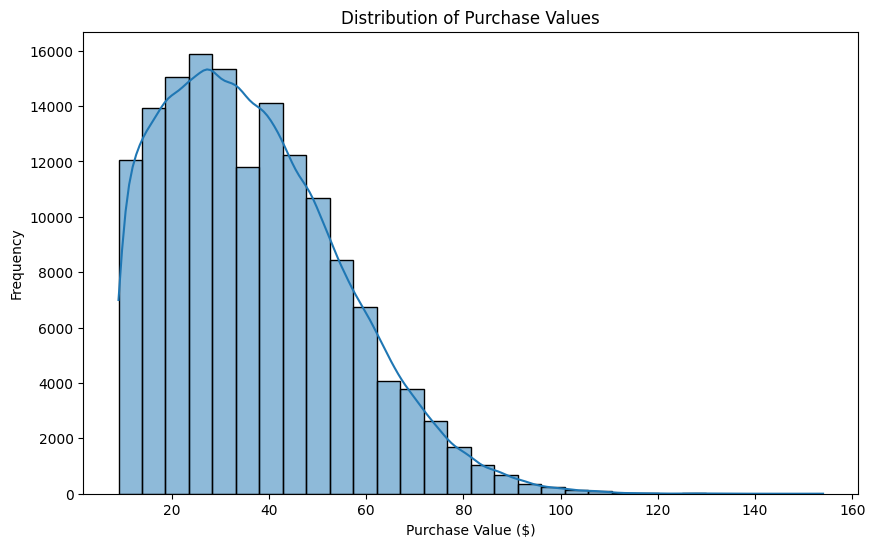

In [30]:
# Distribution of purchase values
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['purchase_value'], bins=30, kde=True)
plt.title('Distribution of Purchase Values')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Frequency')
plt.show()

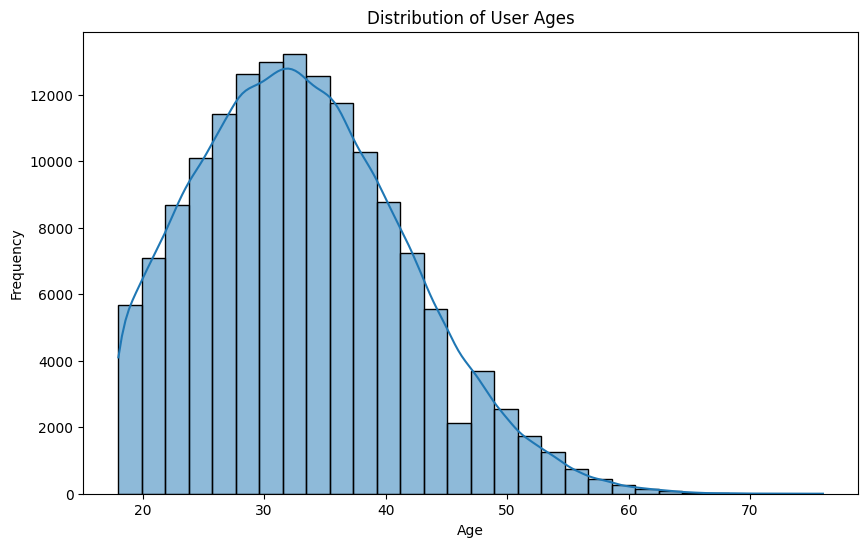

In [31]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

 Bivariate Analysis

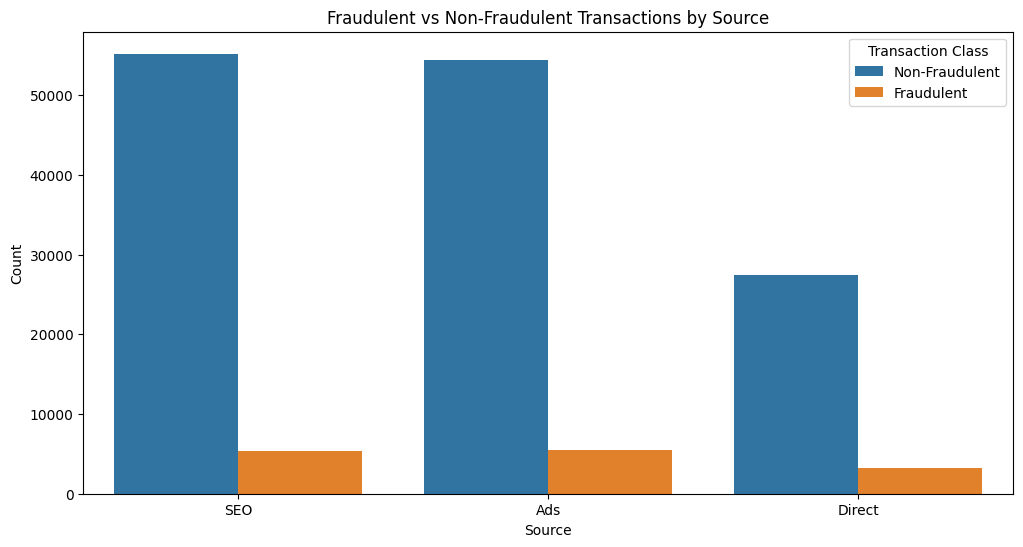

In [32]:
# Fraudulent vs Non-Fraudulent Transactions by Source
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_data, x='source', hue='class')
plt.title('Fraudulent vs Non-Fraudulent Transactions by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Transaction Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


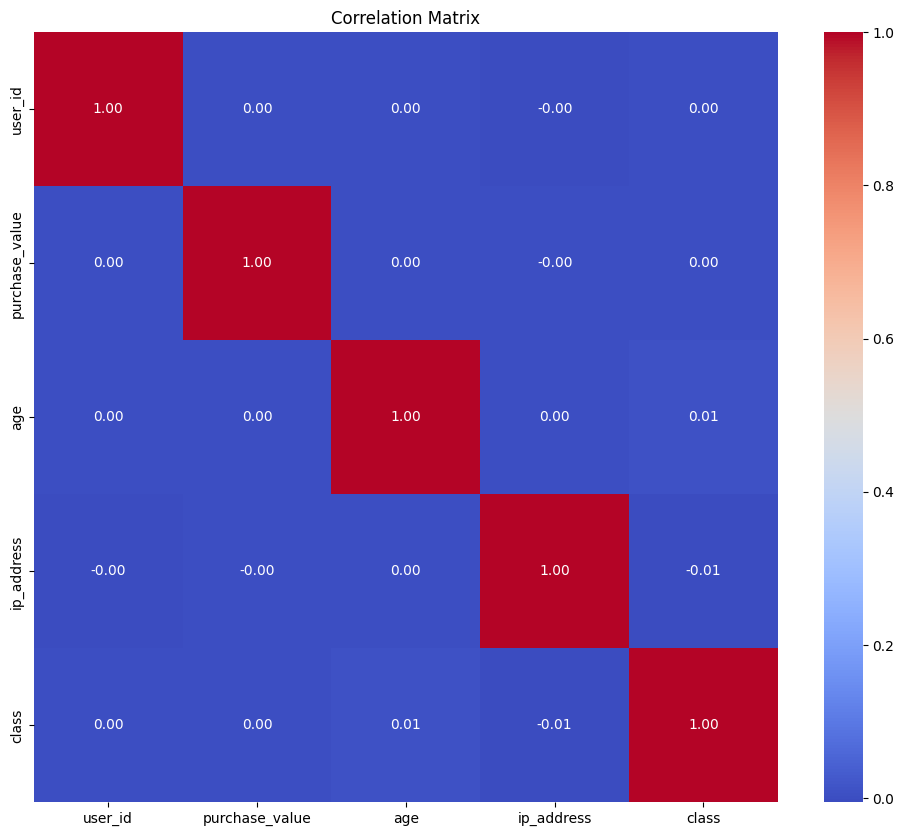

In [34]:
# Check data types of the DataFrame
print(fraud_data.dtypes)

# Select only numeric columns
numeric_columns = fraud_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = fraud_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()